# **Tugas Besar II2211 - Probabilitias dan Statistika**
## Analisis Data menggunakan hasil  **Survei mengenai eLifestyle & Fraud/Penipuan Digital 2025**

Nama   : Raihan Muhammad Daffa</br>
NIM    : 18223140</br>
Kelas  : K-03</br>


## Import Modules
Import modul di sini akan digunakan sebagai alat untuk keperluan pengolahan data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2, chi2_contingency, kstest

## Dataset Interpretated
Data yang diberikan dalam analisis ini adalah dalam bentuk csv. Dataset ini adalah hasil dari jawaban responden dalam survei yang bernama **Survei mengenai eLifestyle & Fraud/Penipuan Digital 2025** yang telah dilakukan data cleansing oleh tim mata kuliah Probablitias dan Statistika


In [2]:
# Membaca Data 
df = pd.read_csv("resources/18223140.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'resources/18223140.csv'

In [ ]:
# Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 165 entries, Jenis_kelamin to Jika_Pernah_mengalami_kerugian_uang__berapa_kerugian_yang_dialami
dtypes: float64(20), int64(33), object(112)
memory usage: 1.3+ MB


## Deskriptif Statistics
Data Kuantitatif (Usia) : Mengidentifikasi mean, q1, q2, q3, p5, p95, std.deviation, variance, min, max

In [ ]:
# Membuat data bedasarkan Umur Responden
df_age = df['Usia__dalam_tahun'].dropna()

# Mengidentifikasi mean
mean_age = df_age.mean()
print(f"Mean: {mean_age:.2f} Tahun")

# Mengidentifikasi q1
q1_age = df_age.quantile(0.25)
print(f"q1: {q1_age:.2f} tahun")

# Mengidentifikasi q2
q2_age = df_age.quantile(0.5)
print(f"q2: {q2_age:.2f} tahun")

# Mengidentifikasi q3
q3_age = df_age.quantile(0.75)
print(f"q3: {q3_age:.2f} tahun")

# Mengidentifikasi p5
p5_age = df_age.quantile(0.05)
print(f"p5: {p5_age:.2f} tahun")

# Mengidentifikasi p95
p95_age = df_age.quantile(0.95)
print(f"p95 : {p95_age:.2f} tahun")

# Mengidentifikasi Standar Deviasi
std_age = df_age.std()
print(f"Standar Deviasi : {std_age:.2f} tahun")

# Mengidentifikasi Variansi
var_age = df_age.var()
print(f"Variansi: {var_age:.2f} tahun")

# Mengidentifikasi Min
min_age = df_age.min()
print(f"Min: {min_age} tahun")

# Mengidentifikasi Max
max_age = df_age.max()
print(f"Max: {max_age} tahun")


Mean: 28.19 Tahun
q1: 19.00 tahun
q2: 21.00 tahun
q3: 37.00 tahun
p5: 18.00 tahun
p95 : 53.05 tahun
Standar Deviasi : 12.34 tahun
Variansi: 152.31 tahun
Min: 10 tahun
Max: 67 tahun


Data kualitatif (Modus, Frekuensi, Persentase):</br>
Variable yang akan digunakan adalah jenis kelamin, pendidikan terakhir, penghasilan per bulan, intensitas aktivitas online selama 3 bulan terakhir, dan jam rata-rata penggunaan internet per hari.

In [ ]:
# Memperoleh data bedasarkan jenis kelamin pendidikan terakhir, penghasilan per bulan, intensitas aktivitas online selama 3 bulan terakhir, dan jam rata-rata penggunaan internet per hari
df_gender = df['Jenis_kelamin'].dropna()
df_last_edu = df['Pendidikan_terakhir'].dropna()
df_income = df['Penghasilan_per_bulan'].dropna()
df_online_intensity_last_three_month = df['Menurut_Anda__bagaimana_intensitas_aktivitas_online_Anda_dalam_3_bulan_terakhir'].dropna()
df_average_internet_per_day = df['Berapa_jam_rata_rata_Anda_menggunakan_Internet_setiap_hari'].dropna()

In [ ]:
# Mengetahui modus dari masing-masing variable bebas
modus_gender = df_gender.mode()
print(f"Modus Jenis Kelamin:{modus_gender}\n")

modus_last_edu = df_last_edu.mode()
print(f"Modus Pendidikan terakhir:{modus_last_edu}\n")

modus_income = df_income.mode()
print(f"Modus pemasukan per bulan:{modus_income}\n")

modus_online_intensity = df_online_intensity_last_three_month.mode()
print(f"Modus intensitas online selama tiga bulan terakhir:{modus_online_intensity}\n")

modus_average_internet_per_day = df_average_internet_per_day.mode()
print(f"Modus rata-rata penggunaan internet per hari:{modus_average_internet_per_day}\n")

Modus Jenis Kelamin:0    Perempuan
Name: Jenis_kelamin, dtype: object

Modus Pendidikan terakhir:0    SMA
Name: Pendidikan_terakhir, dtype: object

Modus pemasukan per bulan:0    < Rp 2 juta
Name: Penghasilan_per_bulan, dtype: object

Modus intensitas online selama tiga bulan terakhir:0    Sangat tinggi
Name: Menurut_Anda__bagaimana_intensitas_aktivitas_online_Anda_dalam_3_bulan_terakhir, dtype: object

Modus rata-rata penggunaan internet per hari:0    > 8 jam
Name: Berapa_jam_rata_rata_Anda_menggunakan_Internet_setiap_hari, dtype: object



In [ ]:
# Mengetahui Frekuensi dari masing-masing variable bebas
fre_gender = df_gender.value_counts()
print(f"Frekuensi Jenis Kelamin: {fre_gender}\n")

fre_last_edu = df_last_edu.value_counts()
print(f"Frekuensi Pendidikan Terakhir: {fre_last_edu}\n")

fre_income = df_income.value_counts()
print(f"Frekuensi Pendapatan per bulan: {fre_income}\n")

fre_online_intensity = df_online_intensity_last_three_month.value_counts()
print(f"Frekuensi Intensitas Online Selama Tiga Bulan Terakhir : {fre_online_intensity}\n")

fre_average_internet_per_day = df_average_internet_per_day.value_counts()
print(f"Frekuensi Rata-Rata penggunaan Internet Per Hari: {fre_average_internet_per_day}\n")


Frekuensi Jenis Kelamin: Jenis_kelamin
Perempuan    552
Laki-laki    448
Name: count, dtype: int64

Frekuensi Pendidikan Terakhir: Pendidikan_terakhir
SMA                       467
S1                        352
S2                        104
D3                         43
D1                          8
S3                          8
D2                          6
SMP                         5
SD                          3
Apoteker                    1
Profesi Apoteker            1
SMK                         1
Flying School /College      1
Name: count, dtype: int64

Frekuensi Pendapatan per bulan: Penghasilan_per_bulan
< Rp 2 juta                459
Rp 2 juta – Rp 5 juta      238
Rp 5 juta – Rp 10 juta     136
Rp 10 juta - Rp 20 juta     88
> Rp 20 juta                79
Name: count, dtype: int64

Frekuensi Intensitas Online Selama Tiga Bulan Terakhir : Menurut_Anda__bagaimana_intensitas_aktivitas_online_Anda_dalam_3_bulan_terakhir
Sangat tinggi    388
Tinggi           378
Sedang           

In [ ]:
# Mengetahui Persentase dari masing-masing Variable Bebas
per_gender = df_gender.value_counts(normalize= True).mul(100).round(2).astype(str) + '%'
print(f"Persentase Jenis Kelamin: {per_gender}\n")

per_last_edu = df_last_edu.value_counts(normalize= True).mul(100).round(2).astype(str) + '%'
print(f"Persentase Pendidikan Terakhir: {per_last_edu}\n")

per_income = df_income.value_counts(normalize= True).mul(100).round(2).astype(str) + '%'
print(f"Persentase Pendapatan per bulan: {per_income}\n")

per_online_intensity = df_online_intensity_last_three_month.value_counts(normalize= True).mul(100).round(2).astype(str) + '%'
print(f"Persentase Intensitas Online Selama Tiga Bulan Terakhir : {per_online_intensity}\n")

per_average_internet_per_day = df_average_internet_per_day.value_counts(normalize= True).mul(100).round(2).astype(str) + '%'
print(f"Persentase Rata-Rata penggunaan Internet Per Hari: {per_average_internet_per_day}\n")

Persentase Jenis Kelamin: Jenis_kelamin
Perempuan    55.2%
Laki-laki    44.8%
Name: proportion, dtype: object

Persentase Pendidikan Terakhir: Pendidikan_terakhir
SMA                       46.7%
S1                        35.2%
S2                        10.4%
D3                         4.3%
D1                         0.8%
S3                         0.8%
D2                         0.6%
SMP                        0.5%
SD                         0.3%
Apoteker                   0.1%
Profesi Apoteker           0.1%
SMK                        0.1%
Flying School /College     0.1%
Name: proportion, dtype: object

Persentase Pendapatan per bulan: Penghasilan_per_bulan
< Rp 2 juta                45.9%
Rp 2 juta – Rp 5 juta      23.8%
Rp 5 juta – Rp 10 juta     13.6%
Rp 10 juta - Rp 20 juta     8.8%
> Rp 20 juta                7.9%
Name: proportion, dtype: object

Persentase Intensitas Online Selama Tiga Bulan Terakhir : Menurut_Anda__bagaimana_intensitas_aktivitas_online_Anda_dalam_3_bulan_terakh

## Data Visualization
Visualisasi data dilakukan dalam 10 diagram yang berbeda dengan variabel-variabel beraneka ragam

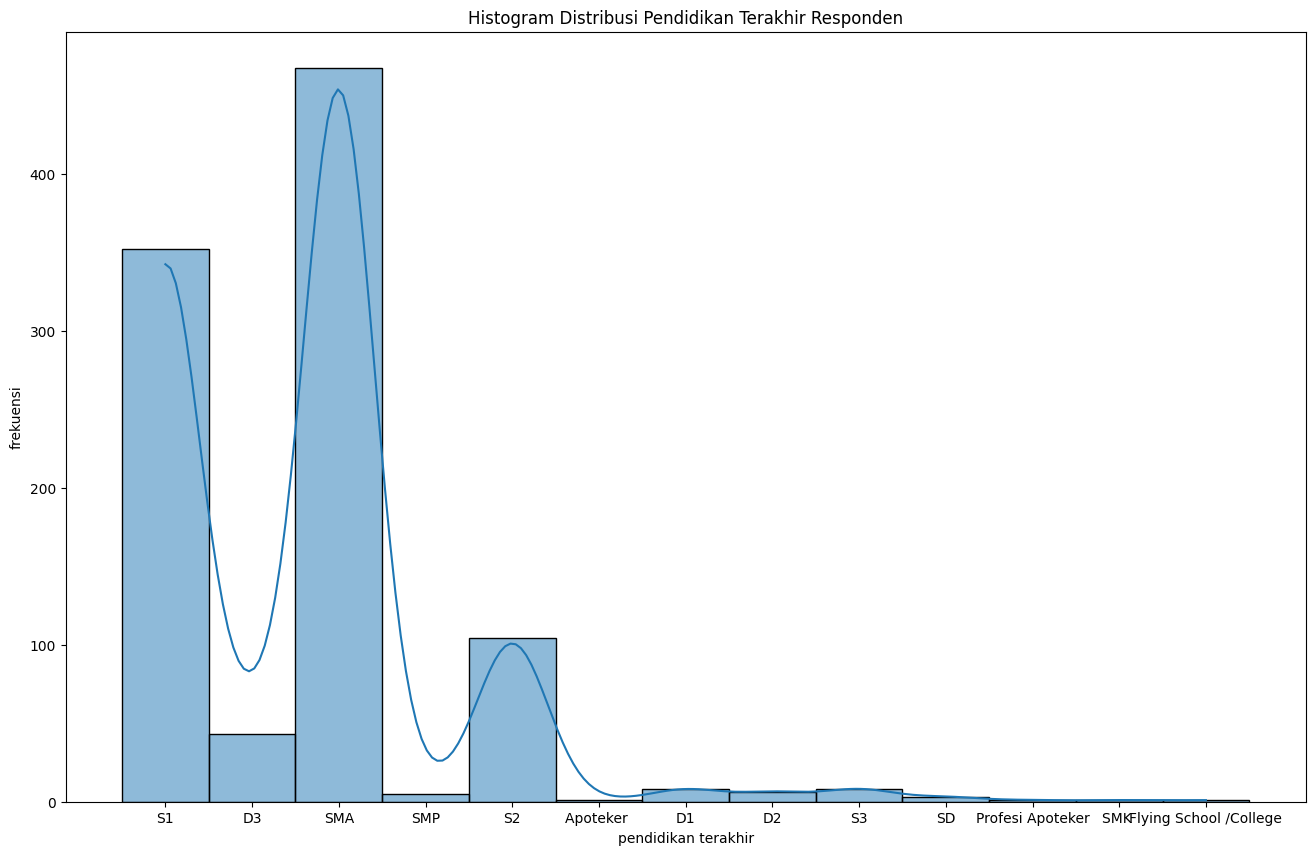

In [ ]:
# Histogram Chart : Menggunakan data Pendidikan terakhir
plt.figure(figsize = (16,10))
sns.histplot(df_last_edu, bins = 20, kde = True)
plt.title('Histogram Distribusi Pendidikan Terakhir Responden')
plt.xlabel('pendidikan terakhir')
plt.ylabel('frekuensi')
plt.show()

C:\Users\Daffa\AppData\Local\Temp\ipykernel_5384\3158480513.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df_use_ai_interaction, order = use_ai_interaction_idx, palette='viridis')


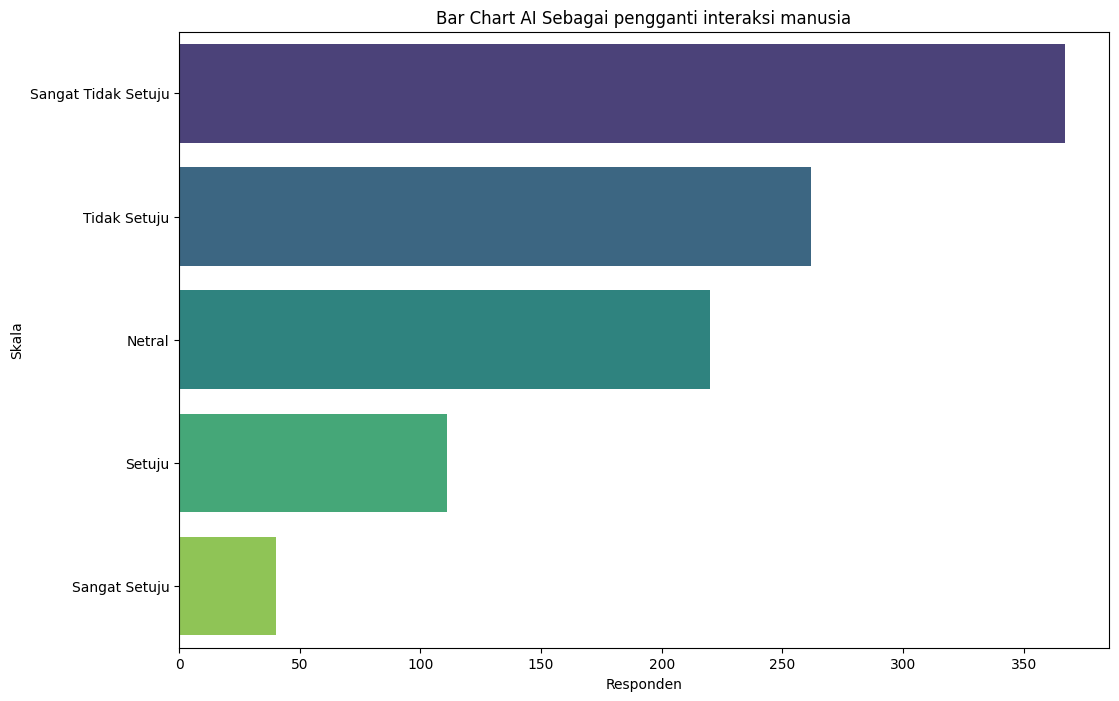

In [ ]:
# Bar Chart
df_use_ai_interaction = df['Seberapa_Setuju_Anda_dengan_pernyataan_berikut____Saya_menggunakan_AI_sebagai_pengganti_interaksi_manusia__Misal_lebih_senang_berbagi_cerita_ke_AI_dibanding_ke_manusia_lain']
use_ai_interaction_idx = df_use_ai_interaction.value_counts().index
plt.figure(figsize= (12,8))
sns.countplot(y = df_use_ai_interaction, order = use_ai_interaction_idx, palette='viridis')
plt.title('Bar Chart AI Sebagai pengganti interaksi manusia')
plt.xlabel('Responden')
plt.ylabel('Skala')
plt.show()

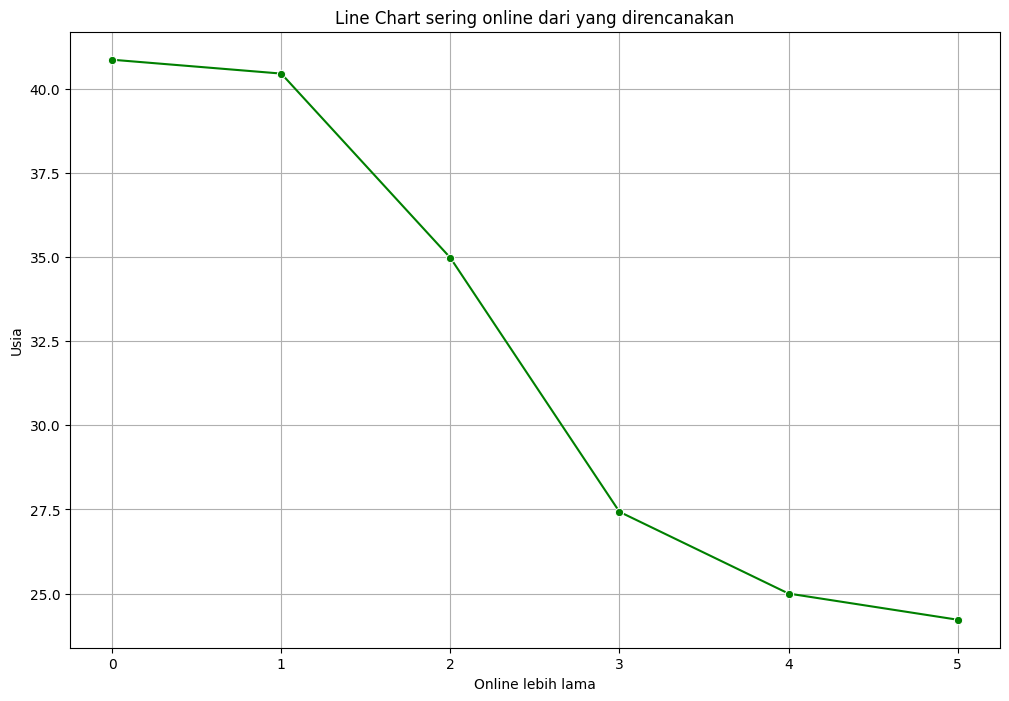

In [ ]:
# Line chart : Menggunakan data dari responden online lebih lama yang direncanakan
plt.figure(figsize= (12,8))
line_data = df.dropna(subset = ['Seberapa_sering_Anda_online_lebih_lama_dari_yang_direncanakan', 'Usia__dalam_tahun'])
avg_long_time = line_data.groupby('Seberapa_sering_Anda_online_lebih_lama_dari_yang_direncanakan')['Usia__dalam_tahun'].mean().reset_index()
sns.lineplot(data = avg_long_time, x = 'Seberapa_sering_Anda_online_lebih_lama_dari_yang_direncanakan', y = 'Usia__dalam_tahun', marker='o', color = 'green' )
plt.title("Line Chart sering online dari yang direncanakan")
plt.xlabel("Online lebih lama")
plt.ylabel('Usia')
plt.grid(True)
plt.show()


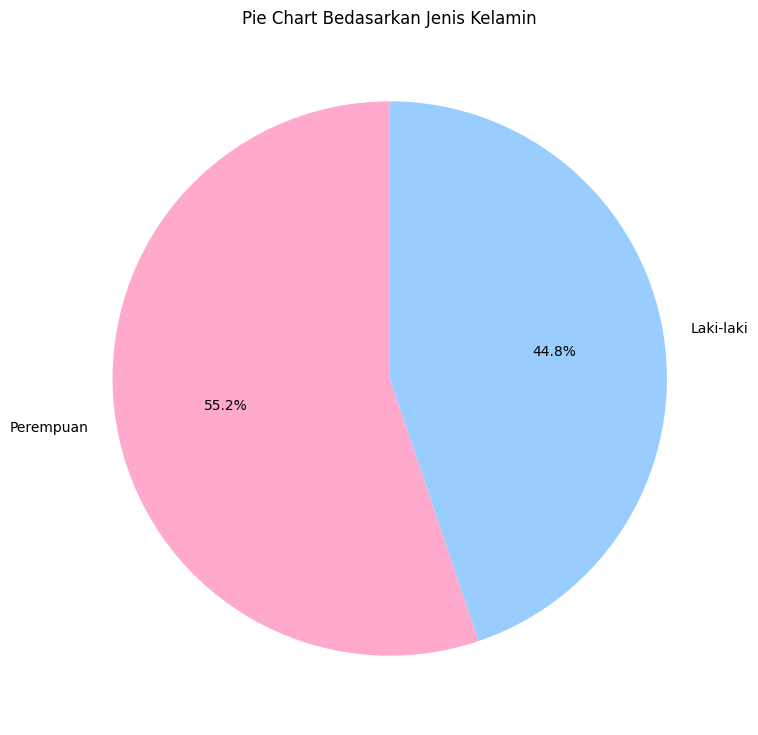

In [ ]:
# Pie Chart : Menggunakan data bedasarkan jenis kelamin
plt.figure(figsize = (9,9))
plt.pie(fre_gender.values, labels = fre_gender.index, autopct = '%1.1f%%', startangle=90, colors=['#ffaacc','#99ccff'])
plt.title("Pie Chart Bedasarkan Jenis Kelamin")
plt.ylabel('')
plt.show()

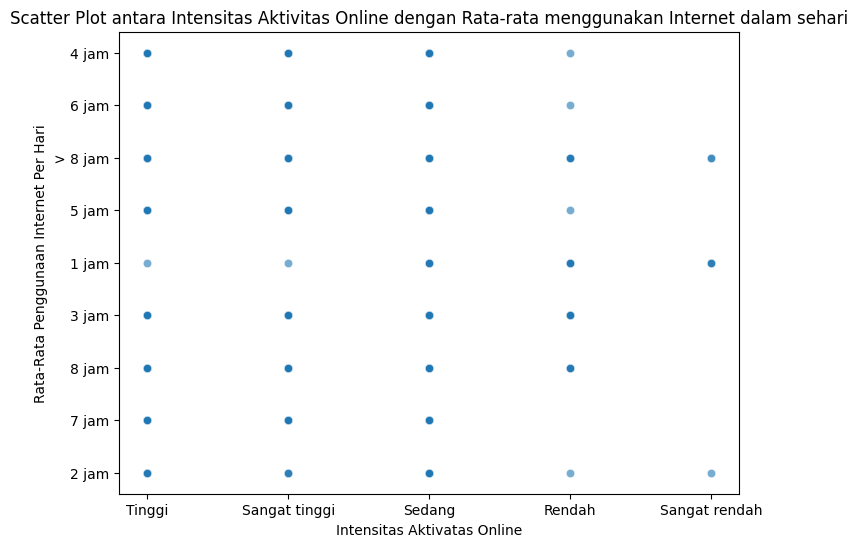

In [ ]:
# Scatter Plot: Melihat dari intensitas aktivitas online dan rata-rata menggunakan internet sehari
plt.figure(figsize = (8,6))
scatter_data = df.dropna(subset = ['Menurut_Anda__bagaimana_intensitas_aktivitas_online_Anda_dalam_3_bulan_terakhir', 'Berapa_jam_rata_rata_Anda_menggunakan_Internet_setiap_hari'])
sns.scatterplot(data = scatter_data, x = "Menurut_Anda__bagaimana_intensitas_aktivitas_online_Anda_dalam_3_bulan_terakhir", y = "Berapa_jam_rata_rata_Anda_menggunakan_Internet_setiap_hari", alpha = 0.6)
plt.title("Scatter Plot antara Intensitas Aktivitas Online dengan Rata-rata menggunakan Internet dalam sehari")
plt.xlabel('Intensitas Aktivatas Online')
plt.ylabel('Rata-Rata Penggunaan Internet Per Hari')
plt.show()


C:\Users\Daffa\AppData\Local\Temp\ipykernel_5384\3156325233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Jenis_kelamin', y='Usia__dalam_tahun', data=df, palette='pastel')


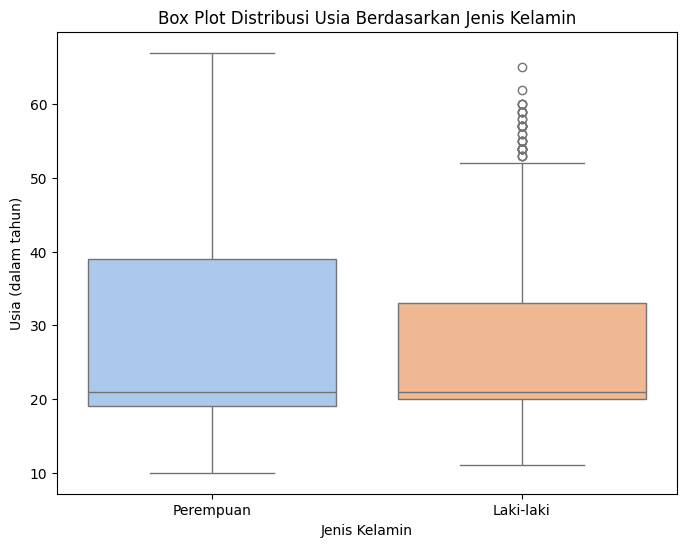

In [ ]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Jenis_kelamin', y='Usia__dalam_tahun', data=df, palette='pastel')
plt.title('Box Plot Distribusi Usia Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Usia (dalam tahun)')
plt.show()

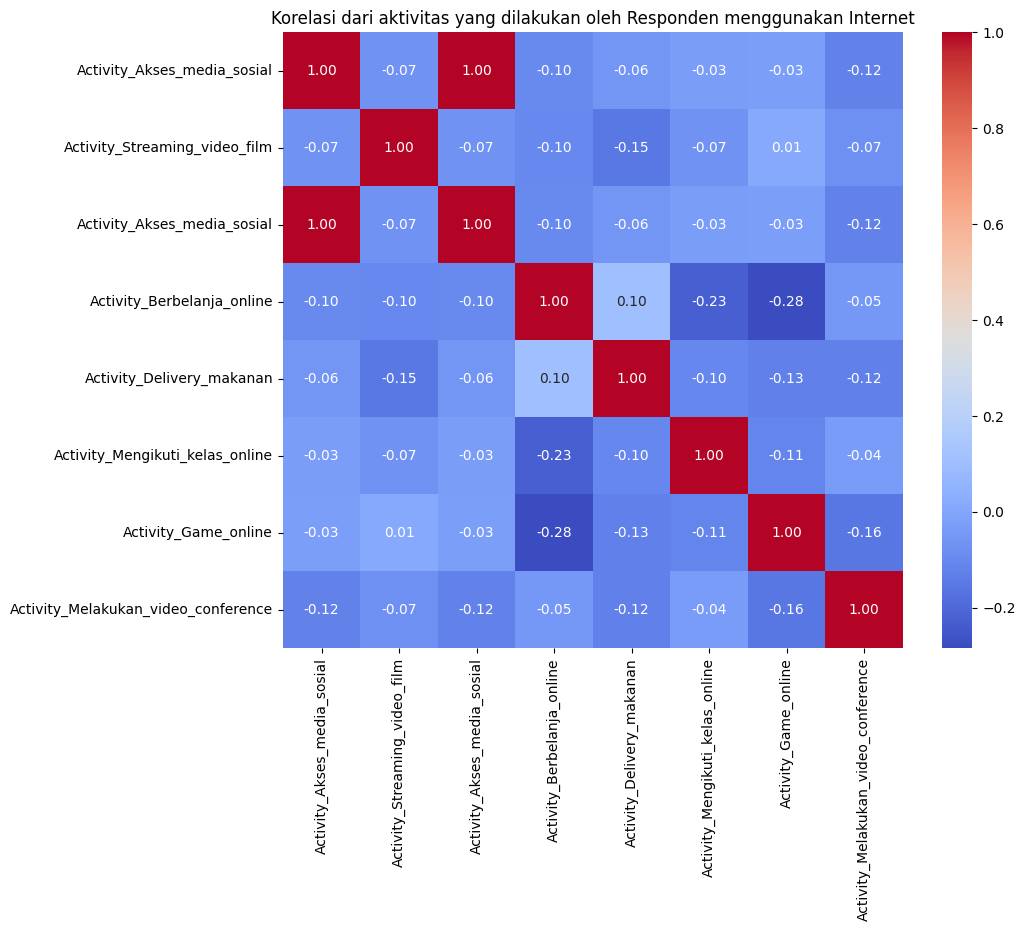

In [ ]:
# Heatmap: menggunakan data dari aktivias yang dilakukan oleh responden
correlation_data = df[['Activity_Akses_media_sosial', 'Activity_Streaming_video_film', 'Activity_Akses_media_sosial', 'Activity_Berbelanja_online', 'Activity_Delivery_makanan', 'Activity_Mengikuti_kelas_online', 'Activity_Game_online', 'Activity_Melakukan_video_conference']]
correlation_matrix = correlation_data.corr()
plt.figure(figsize= (10, 8))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm', fmt=".2f"),
plt.title("Korelasi dari aktivitas yang dilakukan oleh Responden menggunakan Internet")
plt.show()

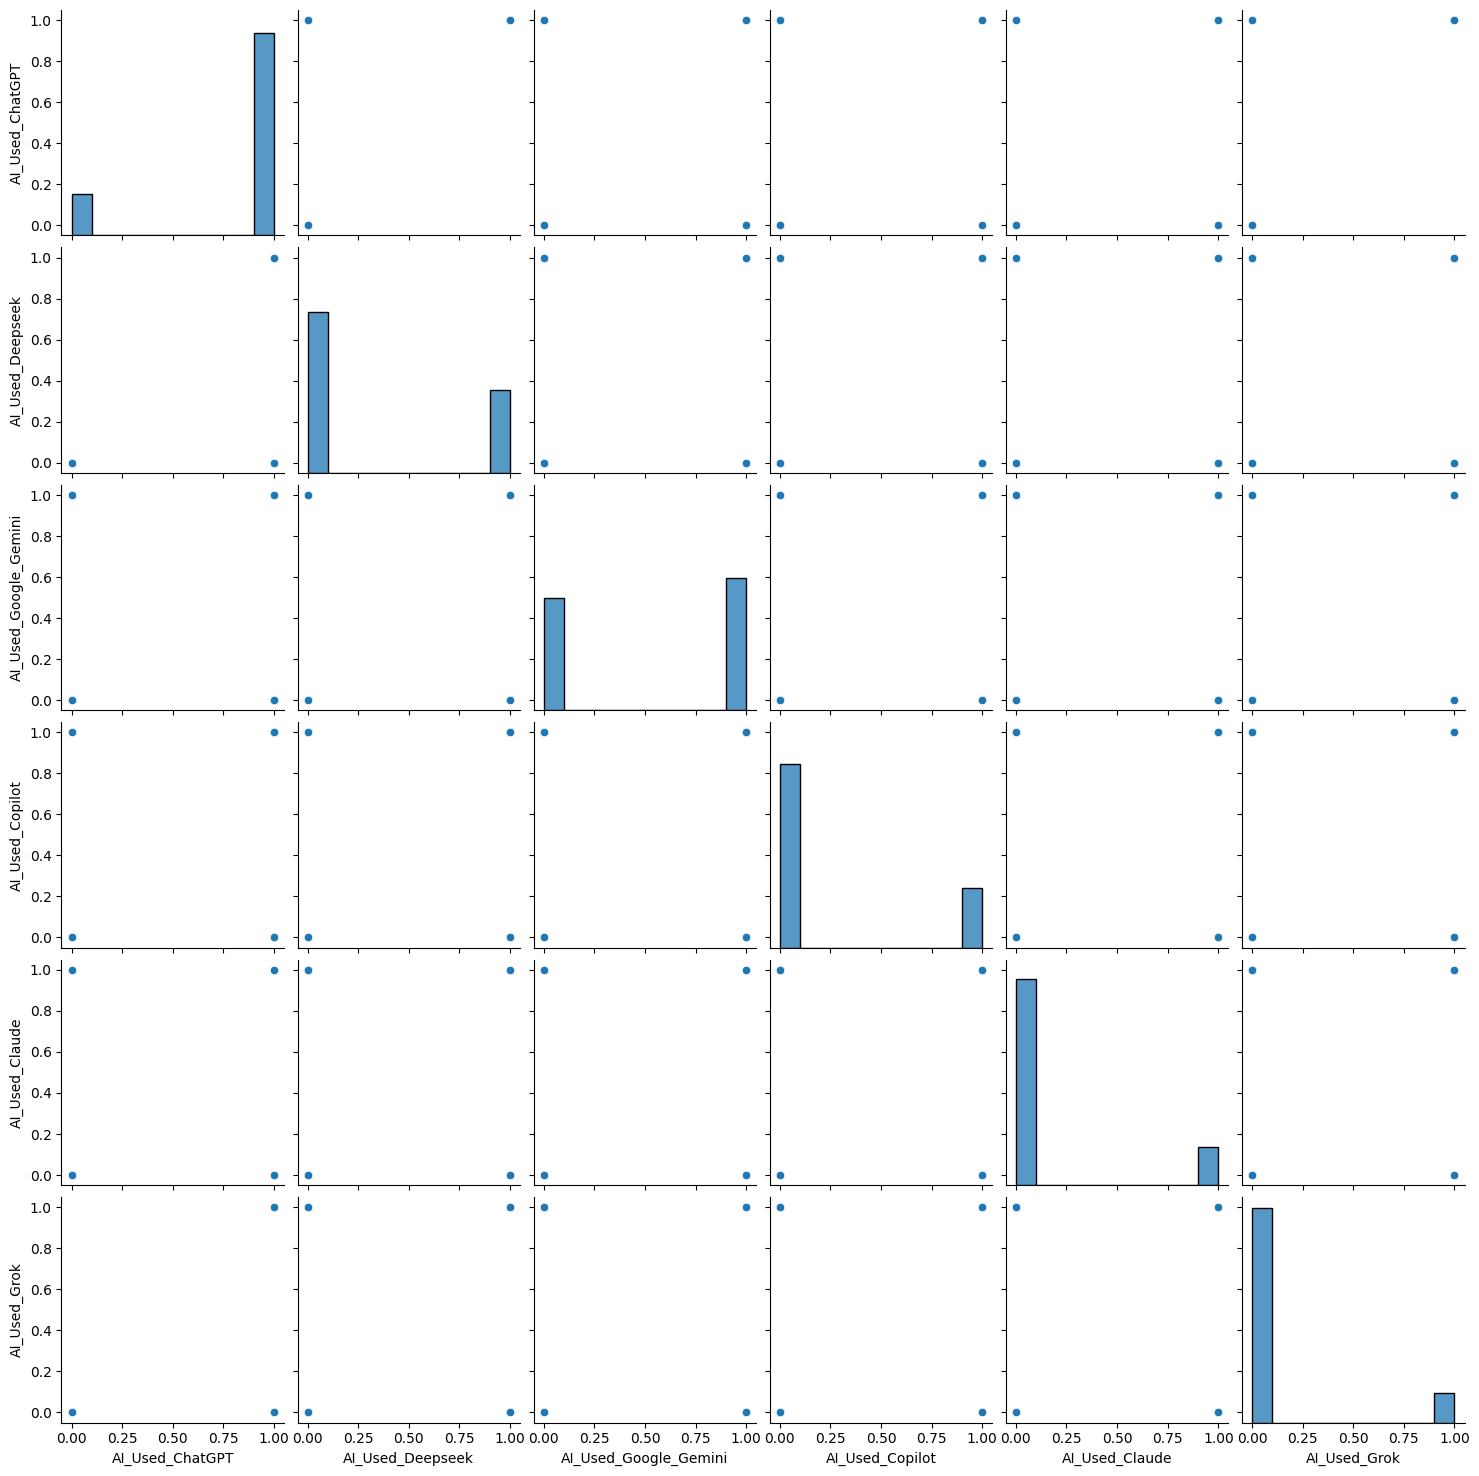

In [ ]:
# Pair Plot: menggunakan Perbandingan dari Penggunaan berbagai platform AI
pair_plot_data = df[['AI_Used_ChatGPT', 'AI_Used_Deepseek', 'AI_Used_Google_Gemini', 'AI_Used_Copilot', 'AI_Used_Claude', 'AI_Used_Grok']]
pair_plot_sample = pair_plot_data.sample(n= 300, random_state= 1)
sns.pairplot(pair_plot_sample)
plt.show()

C:\Users\Daffa\AppData\Local\Temp\ipykernel_5384\915746865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Penghasilan_per_bulan', order=penghasilan_order, palette='plasma')


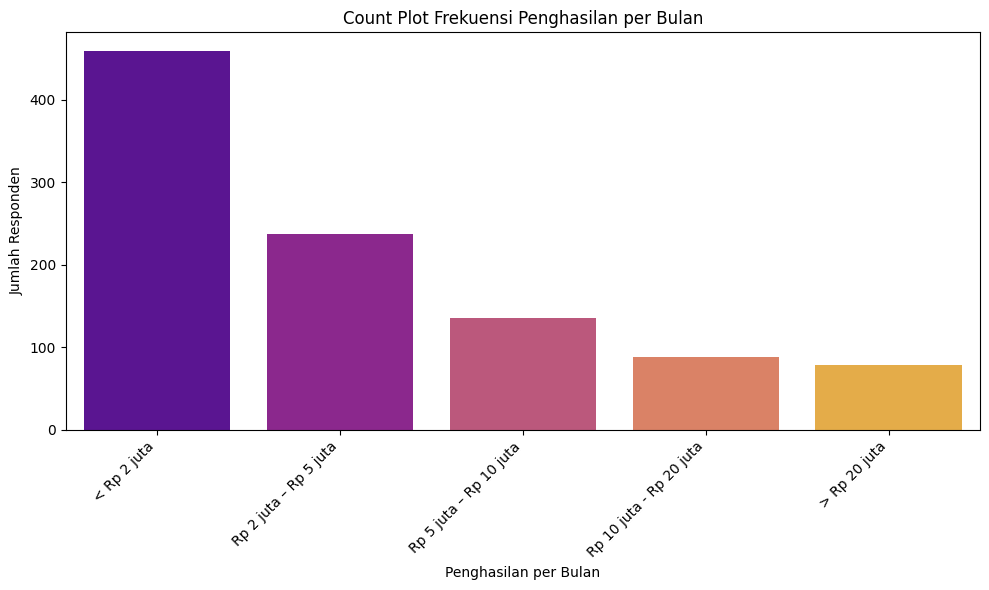

In [ ]:
# Count Plot: mengggunakan frekuensi Penghasilan per bulan responden
plt.figure(figsize=(10, 6))
penghasilan_order = ['< Rp 2 juta', 'Rp 2 juta – Rp 5 juta', 'Rp 5 juta – Rp 10 juta', 'Rp 10 juta - Rp 20 juta', '> Rp 20 juta']
sns.countplot(data=df, x='Penghasilan_per_bulan', order=penghasilan_order, palette='plasma')
plt.title('Count Plot Frekuensi Penghasilan per Bulan')
plt.xlabel('Penghasilan per Bulan')
plt.ylabel('Jumlah Responden')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

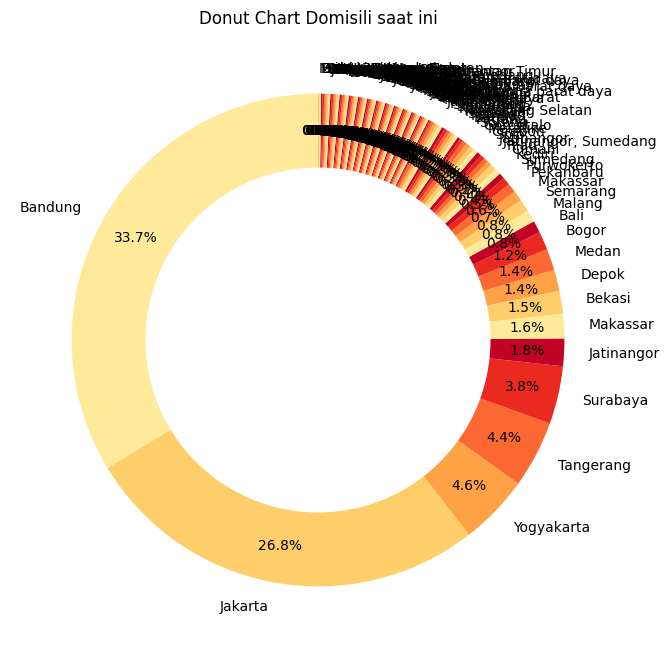

In [ ]:
# Donut Chart : Menggunakan data bedasarkan Domisili
df_domisili = df['Domisili_saat_ini'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(df_domisili, labels=df_domisili.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=sns.color_palette('YlOrRd'))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Donut Chart Domisili saat ini')
plt.show()

## Confidence Intervals
Confidence Intervals dilakukan menggunakan satu sampel dan dua sampel data. Pada Laporan ini, Confidence Intervals yang digunakan dalah 99%

Untuk Confidence Interval secara One-sample Confidence Intervals for Proportions ini, dataframe yang akan digunakan adalah data responden yang menggunakan AI Midjourney dan Google Gemini

In [ ]:
# Confidensial Intervals pengguna AI Midjourney
df_midjourney = df['AI_Used_Midjourney'].dropna()
n_midjourney = len(df_midjourney)
sum_midjourney = df_midjourney.sum()
p_hat_midjourney = sum_midjourney / n_midjourney

ci = 0.99
alpha = 1 - ci
cif = (1 + ci) / 2
z = norm.ppf(cif)

se = np.sqrt(p_hat_midjourney * (1 - p_hat_midjourney) / n_midjourney)
ci_lower_midjourney = p_hat_midjourney - z * se
ci_upper_midjourney = p_hat_midjourney + z * se

print(f"Proporsi Pengguna AI Midjourney: {p_hat_midjourney:.4f}")
print(f"Confidence Interval 99% untuk Proporsi Pengguna AI Midjourney: ({ci_lower_midjourney:.4f}, {ci_upper_midjourney:.4f})")

# Confidensial Intervals pengguna AI Google Gemini
df_google_gemini = df['AI_Used_Google_Gemini'].dropna()
n_google_gemini = len(df_google_gemini)
sum_google_gemini = df_google_gemini.sum()
p_hat_google_gemini = sum_google_gemini / n_google_gemini

se = np.sqrt(p_hat_google_gemini * (1 - p_hat_google_gemini) / n_google_gemini)
ci_lower_google_gemini = p_hat_google_gemini - z * se
ci_upper_google_gemini = p_hat_google_gemini + z * se
print(f"Proporsi Pengguna AI Google Gemini: {p_hat_google_gemini:.4f}")
print(f"Confidence Interval 99% untuk Proporsi Pengguna AI Google Gemini: ({ci_lower_google_gemini:.4f}, {ci_upper_google_gemini:.4f})")


Proporsi Pengguna AI Midjourney: 0.0860
Confidence Interval 99% untuk Proporsi Pengguna AI Midjourney: (0.0632, 0.1088)
Proporsi Pengguna AI Google Gemini: 0.5130
Confidence Interval 99% untuk Proporsi Pengguna AI Google Gemini: (0.4723, 0.5537)


Selain itu, analisis data ini juga akan melakukan Confidence Interval Two-sample confidence intervals for proportion differences. Dataframe yang akan digunakan adalah Kekhawatian untuk ketergantungan berlebihan pada AI bedasarkan jenis kelamin dan kekhawatiran bahwa AI membawa pengaruh negatif pada kreativitas atau kemampuan berpikir bedasarkan domisili Bandung dan Jakarta

In [ ]:
# Confidence Intervals pada kekhawatiran terhadap AI sebagai ketergantungan berlebihan pada AI bedasarkan jenis kelamin
df_ai_too_much_dependency = df['AI_Concern_Ketergantungan_berlebihan_pada_AI'].dropna()
df_male_ai_too_much_dependency = df_ai_too_much_dependency[df['Jenis_kelamin'] == 'Laki-laki'].dropna()
df_female_ai_too_much_dependency = df_ai_too_much_dependency[df['Jenis_kelamin'] == 'Perempuan'].dropna()

n_male_ai_too_much_dependency = len(df_male_ai_too_much_dependency)
n_female_ai_too_much_dependency = len(df_female_ai_too_much_dependency)

sum_male_ai_too_much_dependency = df_male_ai_too_much_dependency.sum()
sum_female_ai_too_much_dependency = df_female_ai_too_much_dependency.sum()

p1 = sum_male_ai_too_much_dependency / n_male_ai_too_much_dependency
p2 = sum_female_ai_too_much_dependency / n_female_ai_too_much_dependency

se1 = np.sqrt((p1 * (1 - p1) / n_male_ai_too_much_dependency) + (p2 * (1 - p2) / n_female_ai_too_much_dependency))
margin_error_dependency_ai = z * se1
ci_lower_ai_too_much_dependency = p1 - p2 - margin_error_dependency_ai 
ci_upper_ai_too_much_dependency = p1 - p2 + margin_error_dependency_ai

print(f"Proporsi Laki-laki yang Khawatir terhadap Ketergantungan Berlebihan pada AI: {p1:.4f}")
print(f"Proporsi Perempuan yang Khawatir terhadap Ketergantungan Berlebihan pada AI: {p2:.4f}")
print(f"Confidence Interval 99% untuk Perbedaan Proporsi Laki-laki dan Perempuan yang Khawatir terhadap Ketergantungan Berlebihan pada AI: ({ci_lower_ai_too_much_dependency:.4f}, {ci_upper_ai_too_much_dependency:.4f})")


# Confidence Intervals pada kekhawatiran terhadap AI sebagai pengaruh negatif pada kreativitias atau kemampuan berpikir kritis bedasarkan domisili Bandung dan Jakarta
df_ai_negative_effect_on_creativity_and_critical_thinking = df['AI_Concern_Pengaruh_negatif_pada_kreativitas_atau_kemampuan_b'].dropna()
df_bandung_ai_negative_effect_on_creativity_and_critical_thinking = df_ai_negative_effect_on_creativity_and_critical_thinking[df['Domisili_saat_ini'] == 'Bandung'].dropna()
df_jakarta_ai_negative_effect_on_creativity_and_critical_thinking = df_ai_negative_effect_on_creativity_and_critical_thinking[df['Domisili_saat_ini'] == 'Jakarta'].dropna()

n_bandung_ai_negative_effect_on_creativity_and_critical_thinking = len(df_bandung_ai_negative_effect_on_creativity_and_critical_thinking)
n_jakarta_ai_negative_effect_on_creativity_and_critical_thinking = len(df_jakarta_ai_negative_effect_on_creativity_and_critical_thinking)

sum_bandung_ai_negative_effect_on_creativity_and_critical_thinking = df_bandung_ai_negative_effect_on_creativity_and_critical_thinking.sum()
sum_jakarta_ai_negative_effect_on_creativity_and_critical_thinking = df_jakarta_ai_negative_effect_on_creativity_and_critical_thinking.sum()

p_hat_bandung = sum_bandung_ai_negative_effect_on_creativity_and_critical_thinking / n_bandung_ai_negative_effect_on_creativity_and_critical_thinking
p_hat_jakarta = sum_jakarta_ai_negative_effect_on_creativity_and_critical_thinking / n_jakarta_ai_negative_effect_on_creativity_and_critical_thinking

se2 = np.sqrt((p_hat_bandung * (1 - p_hat_bandung) / n_bandung_ai_negative_effect_on_creativity_and_critical_thinking) + (p_hat_jakarta * (1 - p_hat_jakarta) / n_jakarta_ai_negative_effect_on_creativity_and_critical_thinking))

margin_error_ai_negative_effect = z * se2
ci_lower_ai_negative_effect = p_hat_bandung - p_hat_jakarta - margin_error_ai_negative_effect
ci_upper_ai_negative_effect = p_hat_bandung - p_hat_jakarta + margin_error_ai_negative_effect

print(f"Proporsi Responden di Bandung yang Khawatir terhadap Pengaruh Negatif AI pada Kreativitas atau Kemampuan Berpikir Kritis: {p_hat_bandung:.4f}")
print(f"Proporsi Responden di Jakarta yang Khawatir terhadap Pengaruh Negatif AI pada Kreativitas atau Kemampuan Berpikir Kritis: {p_hat_jakarta:.4f}")
print(f"Confidence Interval 99% untuk Perbedaan Proporsi Responden di Bandung dan Jakarta yang Khawatir terhadap Pengaruh Negatif AI pada Kreativitas atau Kemampuan Berpikir Kritis: ({ci_lower_ai_negative_effect:.4f}, {ci_upper_ai_negative_effect:.4f})")

Proporsi Laki-laki yang Khawatir terhadap Ketergantungan Berlebihan pada AI: 0.6674
Proporsi Perempuan yang Khawatir terhadap Ketergantungan Berlebihan pada AI: 0.7210
Confidence Interval 99% untuk Perbedaan Proporsi Laki-laki dan Perempuan yang Khawatir terhadap Ketergantungan Berlebihan pada AI: (-0.1291, 0.0219)
Proporsi Responden di Bandung yang Khawatir terhadap Pengaruh Negatif AI pada Kreativitas atau Kemampuan Berpikir Kritis: 0.4303
Proporsi Responden di Jakarta yang Khawatir terhadap Pengaruh Negatif AI pada Kreativitas atau Kemampuan Berpikir Kritis: 0.3731
Confidence Interval 99% untuk Perbedaan Proporsi Responden di Bandung dan Jakarta yang Khawatir terhadap Pengaruh Negatif AI pada Kreativitas atau Kemampuan Berpikir Kritis: (-0.0459, 0.1602)


## Hypothesis Testing
Uji Hipotesis dilakukan dengan satu sampel dan satu pada dua jenis sampel data yang berbeda. Pada Laporan ini, alpha yang digunakan adalah 1%


Pada Uji Hipotesis One-sample z-test for proportions, Dataframe yang akan digunakan adalah aktivitas Streaming Video Film dan aktivitas bermain game online yang dilakukan oleh responden. Uji Hipotesis ini mengira bahwa sekitar 32% responden melakukan aktivitasnya menggunakan internet untuk streaming video film dan ingin membantahnya bahwa ada lebih dari 32% yang melakukan streaming video, dan sekitar 63% atau kurang responden melakukan aktivas menggunakan internet untuk bermain game dan ingin membantahnya bahwa kurang dari 63% yang melakukan video game

In [ ]:
df_activity_video_film_streaming = df['Activity_Streaming_video_film'].dropna()
df_activity_playing_online_games = df['Activity_Game_online'].dropna()


# Uji Hipotesis untuk membuktikan sekitar 32% responden atau lebih melakukan aktivitas menggunakan internet untuk streaming video dan film
alpha = 0.01
h0 = 0.32
h1 = h0 > 0.32

print(f"H0 Streaming Video Film = {h0}")
print(f"H1 Streaming Video Film: h0 > 0.32")
n_streaming_video_film = len(df_activity_video_film_streaming)
sum_streaming_video_film = df_activity_video_film_streaming.sum()
p_hat_streaming_video_film = sum_streaming_video_film / n_streaming_video_film

z_alpha_streaming = norm.ppf(1 - alpha)
print(f"Z_alpha = {z_alpha_streaming:.4f}")
z_stat_streaming = (p_hat_streaming_video_film - h0) / np.sqrt((h0 * (1 - h0)) / n_streaming_video_film)
print(f"Z_stat_streaming = {z_stat_streaming:.4f}")
if z_stat_streaming > z_alpha_streaming:
    print("Tolak H0: Proporsi responden yang melakukan aktivitas streaming video dan film lebih dari 32%")
else:
    print("Gagal Tolak H0: Tidak ada cukup bukti untuk menyatakan bahwa proporsi responden yang melakukan aktivitas streaming video dan film lebih dari 32%")
p_value_streaming = 1 - norm.cdf(z_stat_streaming)
print(f"P-value untuk uji hipotesis streaming video dan film: {p_value_streaming:.4f}\n")

# Uji Hipotesis untuk membuktikan sekitar 63% responden atau kurang melakukan aktivitas bermain game online
h0 = 0.63
h1 = h0 < 0.63

print(f"H0 Game Online = {h0}")
print(f"H1 Game Online: h0 < 0.63")
n_playing_online_games = len(df_activity_playing_online_games)
sum_playing_online_games = df_activity_playing_online_games.sum()
p_hat_playing_online_games = sum_playing_online_games / n_playing_online_games
z_alpha_playing = norm.ppf(1 - alpha)
print(f"Z_alpha = {z_alpha_playing:.4f}")
z_stat_playing = (p_hat_playing_online_games - h0) / np.sqrt((h0 * (1 - h0)) / n_playing_online_games)
print(f"Z_stat_playing = {z_stat_playing:.4f}")

if z_stat_playing < z_alpha_playing:
    print("Tolak H0: Proporsi responden yang melakukan aktivitas bermain game online kurang dari 63%")
else:
    print("Gagal Tolak H0: Tidak ada cukup bukti untuk menyatakan bahwa proporsi responden yang melakukan aktivitas bermain game online kurang dari 63%")
p_value_playing = norm.cdf(z_stat_playing)
print(f"P-value untuk uji hipotesis bermain game online: {p_value_playing:.4f}\n")

H0 Streaming Video Film = 0.32
H1 Streaming Video Film: h0 > 0.32
Z_alpha = 2.3263
Z_stat_streaming = 10.0330
Tolak H0: Proporsi responden yang melakukan aktivitas streaming video dan film lebih dari 32%
P-value untuk uji hipotesis streaming video dan film: 0.0000

H0 Game Online = 0.63
H1 Game Online: h0 < 0.63
Z_alpha = 2.3263
Z_stat_playing = -27.3782
Tolak H0: Proporsi responden yang melakukan aktivitas bermain game online kurang dari 63%
P-value untuk uji hipotesis bermain game online: 0.0000



Selain Uji Hipotesis One-sample z-test for proportions, dilakukan juga Uji Hipotesis secara Two-sample z-test for differences in proportions. Dataframe yang akan digunakan adalah skala sering nilai prestasi responden menjadi turun atau tugas sekolah pekerjaan menjadi tertunda karena sering online bedasarkan jenis kelamin. Dan Skala sering responden kehilangan jam tidur karena begadang demi bisa online saat malam bedasarkan pendidikan terakhir S1 dan SMA. Diketahui alpha = 0.01

In [ ]:
# Uji Hipotesis untuk skala sering nilai prestasi responen menjadi turun atua tugas sekolah pekerjaan menjadi tertunda karena sering online bedasarkan jenis kelamin
alpha = 0.01
df_laki_laki_pekerjaan_tugas_tertunda = df[df['Jenis_kelamin'] == 'Laki-laki']['Seberapa_sering_nilai_prestasi_Anda_turun_atau_tugas_sekolah_pekerjaan_tertunda_karena_sering_online'].dropna()
df_perempuan_pekerjaan_tugas_tertunda = df[df['Jenis_kelamin'] == 'Perempuan']['Seberapa_sering_nilai_prestasi_Anda_turun_atau_tugas_sekolah_pekerjaan_tertunda_karena_sering_online'].dropna()

n_laki_laki_pekerjaan_tugas_tertunda = len(df_laki_laki_pekerjaan_tugas_tertunda)
n_perempuan_pekerjaan_tugas_tertunda = len(df_perempuan_pekerjaan_tugas_tertunda)

mean_laki_laki_pekerjaan_tugas_tertunda = df_laki_laki_pekerjaan_tugas_tertunda.mean()
mean_perempuan_pekerjaan_tugas_tertunda = df_perempuan_pekerjaan_tugas_tertunda.mean()
std_laki_laki_pekerjaan_tugas_tertunda = np.std(df_laki_laki_pekerjaan_tugas_tertunda, ddof=1)
std_perempuan_pekerjaan_tugas_tertunda = np.std(df_perempuan_pekerjaan_tugas_tertunda, ddof=1)

print(f"h0 = laki-laki = perempuan")
print(f"h1 = laki-laki != perempuan")
z_stat_tertunda = (mean_laki_laki_pekerjaan_tugas_tertunda - mean_perempuan_pekerjaan_tugas_tertunda) / np.sqrt((std_laki_laki_pekerjaan_tugas_tertunda**2 / n_laki_laki_pekerjaan_tugas_tertunda) + (std_perempuan_pekerjaan_tugas_tertunda**2 / n_perempuan_pekerjaan_tugas_tertunda))
z_alpha_tertunda = norm.ppf(1 - alpha)
print(f"Z_alpha = {z_alpha_tertunda:.4f}")
print(f"Z_stat_tertunda = {z_stat_tertunda:.4f}")
if z_stat_tertunda * (-1) < z_alpha_tertunda and z_stat_tertunda > z_alpha_tertunda:
    print("Tolak H0: Skala sering nilai prestasi turun atau tugas sekolah/pekerjaan tertunda karena sering online berbeda antara laki-laki dan perempuan")
else:
    print("Gagal Tolak H0: Tidak ada cukup bukti untuk menyatakan bahwa skala sering nilai prestasi turun atau tugas sekolah/pekerjaan tertunda karena sering online berbeda antara laki-laki dan perempuan")
p_value_tertunda = 2 * (1 - norm.cdf(abs(z_stat_tertunda)))
print(f"P-value untuk uji hipotesis skala sering nilai prestasi turun atau tugas sekolah/pekerjaan tertunda: {p_value_tertunda:.4f}\n")

# Uji Hipotesis untuk skala sering responden kehilangan jam tidur karena begadang demi bisa online saat malam bedasarkan pendidikan terakhir S1 dan SMA
alpha = 0.01
df_s1_kehilangan_jam_tidur = df[df['Pendidikan_terakhir'] == 'S1']['Seberapa_sering_Anda_kehilangan_jam_tidur_karena_begadang_demi_bisa_online_saat_malam'].dropna()
df_sma_kehilangan_jam_tidur = df[df['Pendidikan_terakhir'] == 'SMA']['Seberapa_sering_Anda_kehilangan_jam_tidur_karena_begadang_demi_bisa_online_saat_malam'].dropna()

n_s1_kehilangan_jam_tidur = len(df_s1_kehilangan_jam_tidur)
n_sma_kehilangan_jam_tidur = len(df_sma_kehilangan_jam_tidur)

mean_s1_kehilangan_jam_tidur = df_s1_kehilangan_jam_tidur.mean()
mean_sma_kehilangan_jam_tidur = df_sma_kehilangan_jam_tidur.mean()

std_s1_kehilangan_jam_tidur = np.std(df_s1_kehilangan_jam_tidur, ddof=1)
std_sma_kehilangan_jam_tidur = np.std(df_sma_kehilangan_jam_tidur, ddof=1)
print(f"h0 = S1 = SMA")
print(f"h1 = S1 != SMA")

z_stat_kehilangan_jam_tidur = (mean_s1_kehilangan_jam_tidur - mean_sma_kehilangan_jam_tidur) / np.sqrt((std_s1_kehilangan_jam_tidur**2 / n_s1_kehilangan_jam_tidur) + (std_sma_kehilangan_jam_tidur**2 / n_sma_kehilangan_jam_tidur))
z_alpha_kehilangan_jam_tidur = norm.ppf(1 - alpha)
print(f"Z_alpha = {z_alpha_kehilangan_jam_tidur:.4f}")
print(f"Z_stat_kehilangan_jam_tidur = {z_stat_kehilangan_jam_tidur:.4f}")
if z_stat_kehilangan_jam_tidur * (-1) < z_alpha_kehilangan_jam_tidur and z_stat_kehilangan_jam_tidur > z_alpha_kehilangan_jam_tidur:
    print("Tolak H0: Skala sering kehilangan jam tidur karena begadang demi bisa online saat malam berbeda antara S1 dan SMA")
else:
    print("Gagal Tolak H0: Tidak ada cukup bukti untuk menyatakan bahwa skala sering kehilangan jam tidur karena begadang demi bisa online saat malam berbeda antara S1 dan SMA")
p_value_kehilangan_jam_tidur = 2 * (1 - norm.cdf(abs(z_stat_kehilangan_jam_tidur)))
print(f"P-value untuk uji hipotesis skala sering kehilangan jam tidur karena begadang demi bisa online saat malam: {p_value_kehilangan_jam_tidur:.4f}\n")

h0 = laki-laki = perempuan
h1 = laki-laki != perempuan
Z_alpha = 2.3263
Z_stat_tertunda = 3.0491
Tolak H0: Skala sering nilai prestasi turun atau tugas sekolah/pekerjaan tertunda karena sering online berbeda antara laki-laki dan perempuan
P-value untuk uji hipotesis skala sering nilai prestasi turun atau tugas sekolah/pekerjaan tertunda: 0.0023

h0 = S1 = SMA
h1 = S1 != SMA
Z_alpha = 2.3263
Z_stat_kehilangan_jam_tidur = -4.3233
Gagal Tolak H0: Tidak ada cukup bukti untuk menyatakan bahwa skala sering kehilangan jam tidur karena begadang demi bisa online saat malam berbeda antara S1 dan SMA
P-value untuk uji hipotesis skala sering kehilangan jam tidur karena begadang demi bisa online saat malam: 0.0000



#  Chi-Square Tests
Uji Chi-kuadrat terdiri dari tiga rangkaian test, Goodness of Fit Test, Independence Test, dan Homogeneity Test. Dataframe yang akan digunakan untuk ke Goodness of Fit Test adalah test ini adalah rata-rata responden menggunakan internet setiap hari Independence test antara jenis kelamin dan seberapa khawatir responden terhadap penyalahgunaan AI terhadap data pribadi dan privasi. Dan Homogeneity Test antara domisili saat ini dengan seberapa khawatir responden terhadap penyalahan AI sebagai konten hoaks

In [ ]:
alpha = 0.01

# Uji Chi-kuadrat untuk Goodness of Fit untuk Distribusi Rata-Rata Penggunaan Internet per Hari
print(f"H0: Distribusi Rata-Rata Penggunaan Internet per Hari sesuai dengan distribusi yang diharapkan")
print(f"H1: Distribusi Rata-Rata Penggunaan Internet per Hari tidak sesuai dengan distribusi yang diharapkan")

observed_counts = df_average_internet_per_day.value_counts()

total_obs = observed_counts.sum()
expected_counts = np.array([total_obs / len(observed_counts)] * len(observed_counts))
chi_square_stat = ((observed_counts - expected_counts) ** 2 / expected_counts).sum()
df_chi_square = pd.DataFrame({
    'Observed': observed_counts,
    'Expected': expected_counts
})
print(f"Chi-Square Statistic: {chi_square_stat:.4f}")

chi_square_critical = chi2.ppf(1 - alpha, df=len(observed_counts) - 1)
print(f"Chi-Square Critical Value: {chi_square_critical:.4f}")
if chi_square_stat > chi_square_critical:
    print("Tolak H0: Distribusi Rata-Rata Penggunaan Internet per Hari tidak sesuai dengan distribusi yang diharapkan")
else:
    print("Gagal Tolak H0: Tidak ada cukup bukti untuk menyatakan bahwa Distribusi Rata-Rata Penggunaan Internet per Hari tidak sesuai dengan distribusi yang diharapkan")
p_value_gof = 1 - chi2.cdf(chi_square_stat, df=len(observed_counts) - 1)
print(f"P-value untuk uji Chi-Square Goodness of Fit: {p_value_gof:.4f}\n")

# Uji Chi-kuadrat untuk Independence test antara Jenis Kelamin terhadap kekhawatiran bocornya data pribadi dan privasi akibat penyalahgunaan AI
print(f"H0: Jenis Kelamin dan Kekhawatiran Bocornya Data Pribadi dan Privasi akibat Penggunaan AI independen")
print(f"H1: Jenis Kelamin dan Kekhawatiran Bocornya Data Pribadi dan Privasi akibat Penggunaan AI dependen")

contingency_table = pd.crosstab(df['Jenis_kelamin'], df['AI_Concern_Bocornya_atau_penyalahgunaan_data_pribadi_dan_priv'])
chi2_stat, p_value_chi2, dof, expected_freq = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
chi2_critical = chi2.ppf(1 - alpha, df=dof)
print(f"Chi-Square Critical Value: {chi2_critical:.4f}")
if chi2_stat > chi2_critical:
    print("Tolak H0: Jenis Kelamin dan Kekhawatiran Bocornya Data Pribadi dan Privasi akibat Penggunaan AI dependen")
else:
    print("Gagal Tolak H0: Tidak ada cukup bukti untuk menyatakan bahwa Jenis Kelamin dan Kekhawatiran Bocornya Data Pribadi dan Privasi akibat Penggunaan AI dependen")
print(f"P-value untuk uji Chi-Square Independence: {p_value_chi2:.4f}\n")

# Uji Chi-kuadrat untuk homogeneity antara Domisili terhadap kekhawatiran AI sebagai konten yang hoax
print(f"H0: Domisili dan Kekhawatiran AI sebagai Konten Hoax adalah sama (homogen)")
print(f"H1: Domisili dan Kekhawatiran AI sebagai Konten Hoax adalah berbeda (heterogen)")
contingency_table_homogeneity = pd.crosstab(df['Domisili_saat_ini'], df['AI_Concern_hoaks'])

chi2_statistic, p_value, dof, expected_frequencies = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_statistic:.4f}")
chi2_critical_homogeneity = chi2.ppf(0.99, df=dof)
print(f"Chi-Square Critical Value: {chi2_critical_homogeneity:.4f}")
if chi2_statistic > chi2_critical_homogeneity:
    print("Tolak H0: Domisili dan Kekhawatiran AI sebagai Konten Hoax adalah berbeda (heterogen)")
else:
    print("Gagal Tolak H0: Tidak ada cukup bukti untuk menyatakan bahwa Domisili dan Kekhawatiran AI sebagai Konten Hoax adalah berbeda (heterogen)")
print(f"P-value untuk uji Chi-Square Homogeneity: {p_value:.4f}\n")


H0: Distribusi Rata-Rata Penggunaan Internet per Hari sesuai dengan distribusi yang diharapkan
H1: Distribusi Rata-Rata Penggunaan Internet per Hari tidak sesuai dengan distribusi yang diharapkan
Chi-Square Statistic: 684.0080
Chi-Square Critical Value: 20.0902
Tolak H0: Distribusi Rata-Rata Penggunaan Internet per Hari tidak sesuai dengan distribusi yang diharapkan
P-value untuk uji Chi-Square Goodness of Fit: 0.0000

H0: Jenis Kelamin dan Kekhawatiran Bocornya Data Pribadi dan Privasi akibat Penggunaan AI independen
H1: Jenis Kelamin dan Kekhawatiran Bocornya Data Pribadi dan Privasi akibat Penggunaan AI dependen
Chi-Square Statistic: 0.0000
Chi-Square Critical Value: 6.6349
Gagal Tolak H0: Tidak ada cukup bukti untuk menyatakan bahwa Jenis Kelamin dan Kekhawatiran Bocornya Data Pribadi dan Privasi akibat Penggunaan AI dependen
P-value untuk uji Chi-Square Independence: 1.0000

H0: Domisili dan Kekhawatiran AI sebagai Konten Hoax adalah sama (homogen)
H1: Domisili dan Kekhawatiran AI

# Kolmogorov-Smirnov Tasts
Ujo Kolmogorov-Smirnov digunakan untuk menguji apakah distribusi data ini terdistribusi dengan normal

In [ ]:
alpha = 0.01

# Uji Kolmogorov-Smirlov untuk Normalitas Rata-Rata Penggunaan Internet per hari
print(f"H0: Rata-Rata Usia Responden terdistribusi normal")
print(f"H1: Rata-Rata Usia Responden tidak terdistribusi normal")
ks_stat, p_value_ks = kstest(df_age, 'norm', args=(mean_age, std_age))
print(f"KS Statistic: {ks_stat:.4f}")
ks_critical = norm.ppf(1 - alpha / 2)
print(f"KS Critical Value: {ks_critical:.4f}")
if ks_stat < ks_critical:
    print("Gagal Tolak H0: Tidak ada cukup bukti untuk menyatakan bahwa Rata-Rata Usia Responden tidak terdistribusi normal")
else:
    print("Tolak H0: Rata-Rata Usia Responden tidak terdistribusi normal")
print(f"P-value untuk uji Kolmogorov-Smirnov: {p_value_ks:.4f}\n")


H0: Rata-Rata Usia Responden terdistribusi normal
H1: Rata-Rata Usia Responden tidak terdistribusi normal
KS Statistic: 0.2610
KS Critical Value: 2.5758
Gagal Tolak H0: Tidak ada cukup bukti untuk menyatakan bahwa Rata-Rata Usia Responden tidak terdistribusi normal
P-value untuk uji Kolmogorov-Smirnov: 0.0000



# Insight
Setelah melakukan analisis pada 6 beraneka ragam test sebelumnya. Terdapat beberapa insight dari hasil data analisis, yaitu:



- **Data Kuantitatif (Usia)** : data kuantitatif usia responden memiliki **rata-rata: 28,19 tahun, quartil pertama: 19 tahun, median: 21 tahun, quartil ketiga: 37 tahun, persentil 5: 18 tahun, persentil 95: 53,05 tahun, standar deviasi: 12,34 tahun, variansi: 152,31 tahun, min: 10 tahun, dan max: 67 tahun**<br/></br>
- **Data Kualitatif** : Data kualitatif yang dianalisis meliputi data **jenis kelamin, pendidikan terakhir, penghasilan per bulan, intensitas aktivitas online selama tiga bulan terakhir,** dan **rata-rata penggunaan internet setiap hari**. Dari dataset tersebut **modus Jenis kelamin** adalah **perempuan** dengan total **552 responden (55,2%)**, **pendidikan terakhirnya** adalah **SMA** dengan total **467 responden (46,7%)**, Pendapatan per bulan dengan jumlah di bawah 2 juta dengan **459 responden (45,9%)**, Intensitas aktivitas online selama tiga bulan terakhir dengan status sangat tinggi berjumlah **388 responden (38,8%)**, dan rata-rata penggunaan internet setiap hari lebih dari 8 jam sebanyak **340 responden (34,0%)**<br/></br>
- **Visualisasi data**: Visualisasi data dilakukan dengan 10 diagram yang berbeda:</br>
    - **Histogram** : Meliputi distribusi pendidikan terakhir dari semua responden yang didominasi oleh pendidikan terakhir **SMA**</br>
    - **Bar Chart** : Meliputi seberapa setuju penggunaan AI sebagai pengganti interaksi manusia dan didominasi oleh jawaban **Sangat Tidak Setuju**</br>
    - **Line Chart** : Meliputi seberapa sering online yang lebih lama dari yang direncanakan dengan distribusi umur responden dan penggunaan Online lebih lama didominasi oleh responden yang **lebih muda (25 tahun kebawah)**</br>
    - **Pie Chart** : Meliputi distribusi jenis kelamin responden yang mengisi survei yang didominasi oleh **perempuan**</br>
    - **Scatter Plot** : Meliputi distribusi intensitas aktivitas online selama 3 bulan terakhir dengan rata-rata jam penggunaan intenet sehari dan **menunjukkan bahwa hubungan intensitas aktivitas online dan rata-rata penggunaan internet tidak merata**</br>
    - **Box Plot** : Meliputi distribusi Usia bedasarkan Jenis Kelamin dan didominasi oleh **perempuan berusia 20-40 tahun**</br>
    - **Correlation Matrix** : Meliputi matrix dari semua **korelasi aktivitas penggunaan internet**</br>
    - **Pair Plot** : Meliputi distribusi dari semua **penggunaan Platform AI** dari responden</br>
    - **Count Plot** : Meliputi distribusi pendapatan per bulan dari semua responden dan didominasi dengan **responden berpenghasilan dibawah 2 juta**</br>
    - **Donut Chart** : Meliputi distribusi domisili saat ini dari semua responden yang didominasi oleh warga **Bandung**<br/></br>
- **Confidence Intervals**: Confidence Intervals meliputi dua pendekatan yang berbeda dengan nilai CI 99 %</br>
    - **One-sample confidence intervals for proportions**:</br>
        - Confidence Interval dari hasil survei penggunaan AI Midjourney adalah **0,0632** < **p_midjourney** < **0,1088**</br>
        - Confidence Interval dari hasil survei penggunaan AI Google Gemini adalah **0,4723** < **p_google_gemini** < **0,5537**</br>
    - **Two-sample confidence intervals for proportion differences**: </br>
        - Confidence Interval dari hasil survei Khawatir penggunaan AI berlebihan bedasarkan gender adalah **-0.1291** < **p_laki-laki - p_perempuan** < **0,0219**</br>
        - Confidence Interval dari hasil survei Khawatir pengaruh negatif AI pada Kreativitas dan Kemampuan Berpikir Kritis adalah **-0.0459** < **p_bandung - p_jakarta** < **0,1602**<br/></br>
- **Hypothesis Tests**: Uji Hipotesis meliputi dua pendekatan yang berbeda dengan nilai alpha 1%:<br>
    - **One-sample confidence intervals for proportions**:</br>
        - Tidak ada cukup bukti bahwa Proporsi aktivitas pengunaan internet melalui streaming video film sebesar **32% atau kurang**</br>
        - Tidak ada cukup bukti bahwa Proporsi aktivitas pengunaan internet melalui bermain game online sebesar **63% atau lebih**</br>
    - **Two-sample confidence intervals for proportion differences**: </br>
        - **Terdapat cukup bukti** bahwa skala sering nilai prestasi turun atau tugas sekolah/pekerjaan tertunda karena sering online **berbeda** bedasarkan gender</br>
        - **Tidak ada cukup bukti** untuk menyatakan bahwa skala sering kehilangan jam tidur karena begadang demi bisa online saat malam **berbeda** antara S1 dan SMA<br/></br>
- **Chi-Square Test**: Uji chi-kuadrat meliputi tiga pendekatan yang berbeda dengan nilai alpha 1%:<br/>
    - **Goodness of Fit Test**:</br>
        - Distribusi rata-rata penggunaan internet per hari **tidak sesuai dengan distribusi yang diharapkan**</br>
    - **Independence Test**:</br>
        - Jenis Kelamin dan Kekhawatiran Bocornya data pribadi akibat penggunaan AI berstatus **tidak bergantung sama sekali (independen)** </br>
    - **Homogeneity Test**:</br>
        - Domisili saat ini dan kekhawatiran AI sebagai konten hoax adalah **sama (homogen)**<br></br>
- **Kolmogorov-Smirlov Test**: Uji Kolmogorov-Smirlov digunakan untuk mengetahui normalize suatu data. Dari hasil yang diperoleh ditunjukan bahwa Rata-Rata usia responden **terdistribusi normal**
    